# Board Game Reviews

Board games have been making a comeback lately, and deeper, more strategic 
boardgames, like Settlers of Catan have become hugely popular. A popular site 
where these types of board games are discussed and reviewed is BoardGameGeek.

In this project, the dataset contains 80000 board games and their associated review scores. The data was scraped from BoardGameGeek and compiled into CSV format by Sean Beck. The dataset is stored in board_games.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
board_games = pd.read_csv('board_games.csv')
print(board_games.head())
# Dropping null valued rows
board_games.dropna(axis=0,inplace= True)
# Drop rows with 0 valued user ratings
board_games = board_games[board_games['users_rated']!=0]


       id       type                                       name  \
0   12333  boardgame                          Twilight Struggle   
1  120677  boardgame                              Terra Mystica   
2  102794  boardgame                  Caverna: The Cave Farmers   
3   25613  boardgame  Through the Ages: A Story of Civilization   
4    3076  boardgame                                Puerto Rico   

   yearpublished  minplayers  maxplayers  playingtime  minplaytime  \
0         2005.0         2.0         2.0        180.0        180.0   
1         2012.0         2.0         5.0        150.0         60.0   
2         2013.0         1.0         7.0        210.0         30.0   
3         2006.0         2.0         4.0        240.0        240.0   
4         2002.0         2.0         5.0        150.0         90.0   

   maxplaytime  minage  users_rated  average_rating  bayes_average_rating  \
0        180.0    13.0        20113         8.33774               8.22186   
1        150.0    12.0

1.57881605958
6.01611284933


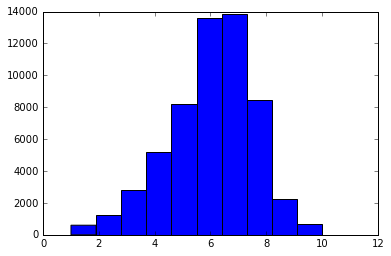

In [2]:
# Analyzing the average_ratings to find out which error metric is suitable
plt.hist(board_games['average_rating'])
print(np.std(board_games['average_rating']))
print(np.mean(board_games['average_rating']))

Since the average_rating is continous and follows somewhat normal distribution, we can choose mean square error as error metric.

In [3]:
# Find possible patterns in data 
from sklearn.cluster import KMeans
numeric_columns = board_games.iloc[:,3:]
kmeans_model = KMeans(n_clusters=5)
distances = kmeans_model.fit(numeric_columns)
labels = kmeans_model.labels_

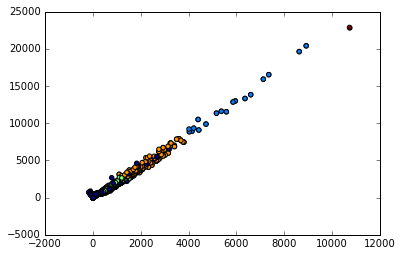

In [4]:
# Find possible patterns in data using KMeans clustering
game_mean = numeric_columns.apply(np.mean,axis=1)
game_std = numeric_columns.apply(np.std,axis=1)
plt.scatter(game_mean,game_std,c=labels)
plt.show()

The plot shows that majority of the games are identical as they are grouped 
together. However, when game attribute values are increased, the relationship 
between those attributes is decreased thereby reducing the quality of the game.

In [34]:
# Find the correlations between different columns
correlations = numeric_columns.corr(method='pearson')
print(correlations['average_rating'])

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


Surprisingly, the years published has some good correlation whith average_rating.
Also games for older players (minage is high) are also showing high correlation 
with average_rating.

2.09339697583


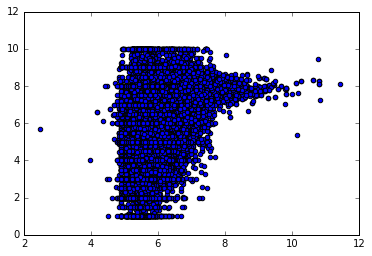

In [6]:
# Build a linear Regression model to predict average_rating
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
cols = list(board_games.columns)
cols.remove("name")
cols.remove("id")
cols.remove("type")
cols.remove("average_rating")
cols.remove("bayes_average_rating")
reg.fit(board_games[cols],board_games['average_rating'])
predictions = reg.predict(board_games[cols])
mse = np.mean((predictions - board_games['average_rating'])**2)
print(mse)

plt.scatter(predictions,board_games['average_rating'])
plt.show()

The error rate is close to standard deviation which implies that the model 
did not have a high predictive power. Also, the plot show the there is hardly any 
linear relationship between predictions and average_rating.

### Accuracy using validation 

In [ ]:
# shuffled_index = np.random.permutation(board_games.index)
shuffled = board_games.loc[shuffled_index]
train = shuffled.iloc[0:39800]
test = shuffled.iloc[39800:]

reg.fit(train[cols],train['average_rating'])
predictions = reg.predict(train[cols])
mse = np.mean((predictions - train['average_rating'])**2)
print(mse)
predictions = reg.predict(test[cols])
mse = np.mean((predictions - test['average_rating'])**2)
print(mse)
plt.scatter(predictions,test['average_rating'])
plt.show()

### Accuracy using K-Fold validation

In [27]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

In [33]:
kf=KFold(len(board_games),5,shuffle = True,random_state = 8)
for train_index, test_index in kf:
    train = shuffled.iloc[train_index]
    test = shuffled.iloc[test_index]
    reg.fit(train[cols],train['average_rating'])
    predictions = reg.predict(train[cols])
    mse = np.mean((predictions - train['average_rating'])**2)
    print(mse)
    predictions = reg.predict(test[cols])
    mse = np.mean((predictions - test['average_rating'])**2)
    print(mse)
        

2.08955445689
2.10927922208
2.09428712419
2.09191073243
2.09256755322
2.09872146461
2.10207428397
2.05915645454
2.08778557277
2.11621808324


The best accuracy that can be achieved usin

In [36]:
cols=['minage','average_weight','total_wanters','total_wishers']
kf=KFold(len(board_games),5,shuffle = True,random_state = 8)
for train_index, test_index in kf:
    train = shuffled.iloc[train_index]
    test = shuffled.iloc[test_index]
    reg.fit(train[cols],train['average_rating'])
    predictions = reg.predict(train[cols])
    mse = np.mean((predictions - train['average_rating'])**2)
    print(mse)
    predictions = reg.predict(test[cols])
    mse = np.mean((predictions - test['average_rating'])**2)
    print(mse)

2.11746206128
2.13159059837
2.12197382105
2.11352331581
2.11970407862
2.12257778978
2.12825619179
2.08841770731
2.11387884126
2.14592117627
